# [Installation](http://renom.jp/renomdl/ja/rsts/installation/main.html)

ReNomを使用するための準備として, 以下のステップを実行してください.
1. Python2.7もしくはPython3.4をインストール.
1. ReNomをインストール

最初にPythonをインストールする必要があります.ここではPythonをインストールする方法については説明しません.ReNomは以下のリンク(github)よりダウンロードすることができます.

URL: https://github.com/ReNom-dev-team/ReNom

Cuda ToolkitやcuDNNをインストールし, GPUを使用するための環境が整っている場合, 以下のコマンドを実行することでReNomをインストールできます.

```
git clone https://github.com/ReNom-dev-team/ReNom.git
cd ReNom
python setup.py build_ext -f -i
pip install -e .
```
CPU環境のみで実行する場合, 以下のコマンドを実行してください
```
git clone https://github.com/ReNom-dev-team/ReNom.git
cd ReNom
pip install -e .
```
**Requirements**

ReNom では以下のライブラリが必要です.
* Linux / Ubuntu
* Python 2.7, 3.4
* Numpy 1.13.0, 1.12.1 http://www.numpy.org/
* cuDNN 5.1 https://developer.nvidia.com/cudnn
* CUDA ToolKit 8.0 https://developer.nvidia.com/cuda-toolkit
* bottle 0.12.13 https://bottlepy.org/docs/dev/
* matplotlib 2.0.2 https://matplotlib.org
* networkx 1.11 https://networkx.github.io
* pandas 0.20.3 http://pandas.pydata.org
* scikit-learn 0.18.2 http://scikit-learn.org/stable/
* scipy https://www.scipy.org

In [1]:
# Google Colab でインストールされているパッケージの確認
# cuda, cuDNN は最初からインストール済だが、pip で確認できないのでインストールディレクトリを確認する
!python --version
!pip freeze | grep -E ^\(numpy\|bottle\|matplotlib\|networkx\|pandas\|scikit-learn\|scipy\)=
!ls -1 /usr/lib/x86_64-linux-gnu/libcuda*
!ls -1 /usr/lib64-nvidia/libcudnn*

Python 3.6.7
matplotlib==3.0.3
networkx==2.2
numpy==1.14.6
pandas==0.22.0
scikit-learn==0.20.3
scipy==1.1.0
/usr/lib/x86_64-linux-gnu/libcuda.so
/usr/lib/x86_64-linux-gnu/libcuda.so.1
/usr/lib/x86_64-linux-gnu/libcuda.so.418.43
ls: cannot access '/usr/lib64-nvidia/libcudnn*': No such file or directory


In [2]:
# 足りない分を追加インストールする
# Requirements に載っていないが、GPU使用時の setup.py の実行に cython が必要
!pip install bottle
!pip install cython

    100% |████████████████████████████████| 92kB 4.0MB/s 


In [3]:
# CUDA と cuDNN をインストールする。参考：https://qiita.com/yukoba/items/3692f1cb677b2383c983
#
# CUDA Toolkit 8.0 GA2 のインストール
# 元々入っている /usr/lib/x86_64-linux-gnu/libcudart.so.8.0.61 のバージョンに合わせている
%cd /content/
!apt-key adv --fetch-keys http://developer.download.nvidia.com/compute/cuda/repos/ubuntu1604/x86_64/7fa2af80.pub
!wget https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1604/x86_64/cuda-repo-ubuntu1604_8.0.61-1_amd64.deb
#!dpkg -i cuda-repo-ubuntu1604_8.0.61-1_amd64.deb
!apt install ./cuda-repo-ubuntu1604_8.0.61-1_amd64.deb
!apt update
!apt install cuda-8.0
!rm cuda-repo-ubuntu1604_8.0.61-1_amd64.deb

/content
Executing: /tmp/apt-key-gpghome.BMpFf1Sn3P/gpg.1.sh --fetch-keys http://developer.download.nvidia.com/compute/cuda/repos/ubuntu1604/x86_64/7fa2af80.pub
gpg: requesting key from 'http://developer.download.nvidia.com/compute/cuda/repos/ubuntu1604/x86_64/7fa2af80.pub'
gpg: key F60F4B3D7FA2AF80: "cudatools <cudatools@nvidia.com>" not changed
gpg: Total number processed: 1
gpg:              unchanged: 1
--2019-03-14 06:45:54--  https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1604/x86_64/cuda-repo-ubuntu1604_8.0.61-1_amd64.deb
Resolving developer.download.nvidia.com (developer.download.nvidia.com)... 192.229.211.70, 2606:2800:21f:3aa:dcf:37b:1ed6:1fb
Connecting to developer.download.nvidia.com (developer.download.nvidia.com)|192.229.211.70|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2690 (2.6K) [application/x-deb]
Saving to: ‘cuda-repo-ubuntu1604_8.0.61-1_amd64.deb’

cuda-repo-ubuntu160 100%[===================>]   2.63K  --.-KB/s    in 0

In [4]:
# cuDNN 6.0.21 のインストール
%cd /content/
!wget http://developer.download.nvidia.com/compute/redist/cudnn/v6.0/cudnn-8.0-linux-x64-v6.0.tgz
!tar xzf cudnn-8.0-linux-x64-v6.0.tgz
!rm cudnn-8.0-linux-x64-v6.0.tgz
!cp -a cuda/lib64/* /usr/local/cuda/lib64/
!cp -a cuda/include/* /usr/local/cuda/include/
!ldconfig

/content
--2019-03-14 06:48:15--  http://developer.download.nvidia.com/compute/redist/cudnn/v6.0/cudnn-8.0-linux-x64-v6.0.tgz
Resolving developer.download.nvidia.com (developer.download.nvidia.com)... 192.229.211.70, 2606:2800:21f:3aa:dcf:37b:1ed6:1fb
Connecting to developer.download.nvidia.com (developer.download.nvidia.com)|192.229.211.70|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 201134139 (192M) [application/x-compressed]
Saving to: ‘cudnn-8.0-linux-x64-v6.0.tgz’

cudnn-8.0-linux-x64 100%[===================>] 191.82M   188MB/s    in 1.0s    

2019-03-14 06:48:16 (188 MB/s) - ‘cudnn-8.0-linux-x64-v6.0.tgz’ saved [201134139/201134139]



In [5]:
# nvcc のある /usr/local/cuda/bin に PATH を通す
import os
os.environ["PATH"] = f'/usr/local/cuda/bin:{os.environ["PATH"]}'
os.environ["LD_LIBRARY_PATH"] = f'/usr/local/cuda/lib64:{os.environ["LD_LIBRARY_PATH"]}'
!env | grep PATH

LD_LIBRARY_PATH=/usr/local/cuda/lib64:/usr/lib64-nvidia
LIBRARY_PATH=/usr/local/cuda/lib64/stubs
PYTHONPATH=/env/python
PATH=/usr/local/cuda/bin:/usr/local/bin:/usr/local/nvidia/bin:/usr/local/cuda/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/tools/node/bin:/tools/google-cloud-sdk/bin:/opt/bin


In [6]:
# デフォルトの gcc/g++ は 7.2.0 だが、nvcc が 6 以降に対応していないため 5 をインストールする
!apt install gcc-5 g++-5
!ln -s /usr/bin/gcc-5 /usr/local/cuda/bin/gcc
!ln -s /usr/bin/g++-5 /usr/local/cuda/bin/g++

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-410
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  cpp-5 gcc-5-base libasan2 libgcc-5-dev libisl15 libmpx0 libstdc++-5-dev
Suggested packages:
  gcc-5-locales g++-5-multilib gcc-5-doc libstdc++6-5-dbg gcc-5-multilib
  libgcc1-dbg libgomp1-dbg libitm1-dbg libatomic1-dbg libasan2-dbg
  liblsan0-dbg libtsan0-dbg libubsan0-dbg libcilkrts5-dbg libmpx0-dbg
  libquadmath0-dbg libstdc++-5-doc
The following NEW packages will be installed:
  cpp-5 g++-5 gcc-5 gcc-5-base libasan2 libgcc-5-dev libisl15 libmpx0
  libstdc++-5-dev
0 upgraded, 9 newly installed, 0 to remove and 54 not upgraded.
Need to get 29.1 MB of archives.
After this operation, 100 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 gcc-5-base amd64 

In [7]:
# ReNom を github から取得
%cd /content/
!git clone https://github.com/ReNom-dev-team/ReNom.git
%cd ReNom
# GPU を使う場合の setup.py 実行
!python setup.py build_ext -f -i
# インストール
!pip install -e .

/content
Cloning into 'ReNom'...
remote: Enumerating objects: 488, done.
remote: Counting objects: 100% (488/488), done.
remote: Compressing objects: 100% (201/201), done.
remote: Total 26693 (delta 308), reused 404 (delta 273), pack-reused 26205
Receiving objects: 100% (26693/26693), 16.02 MiB | 3.71 MiB/s, done.
Resolving deltas: 100% (4854/4854), done.
/content/ReNom
running build_ext
building 'cuda_misc_a' library
creating build
creating build/temp.linux-x86_64-3.6
creating build/temp.linux-x86_64-3.6/renom
creating build/temp.linux-x86_64-3.6/renom/cuda
creating build/temp.linux-x86_64-3.6/renom/cuda/thrust
nvcc --device-c -c --compiler-options -pthread,-DNDEBUG,-g,-fwrapv,-O2,-Wall,-g,-fstack-protector-strong,-Wformat,-Werror=format-security,-Wdate-time,-D_FORTIFY_SOURCE=2,-fPIC -arch=sm_30 -I/usr/local/lib/python3.6/dist-packages/numpy/core/include -I/usr/include/python3.6m -c renom/cuda/thrust/thrust_funcs_float.cu -o build/temp.linux-x86_64-3.6/renom/cuda/thrust/thrust_funcs_f

# [ソースコードからのReNomTDAのインストール](http://renom.jp/ja/notebooks/tda-2.1.0/how-to-install-with-source/notebook.html)

ソースコードからReNomTDAのインストールするチュートリアル

ReNomTDAには2種類のインストール方法があります.

このチュートリアルではソースコードからインストールする方法を説明します.

**Requirements**

ReNomTDAを使うにはReNomのインストールが必要です.

ReNomをまだインストールしていない場合はインストールを行ってください.

ReNomのインストール方法は http://renom.jp/rsts/renomdl/installation/main.html から参照できます.

**ソースコードからのインストール**
ReNomTDAは次のコマンドでインストールすることができます.
```
git clone https://github.com/ReNom-dev-team/ReNomTDA.git
cd ReNomTDA
pip install -e .
```
**ReNomTDAウェブアプリの起動**

インストールしたらrenom_tda コマンドが使用できます.

このコマンドでReNomTDAのウェブアプリケーションを起動することができます.

または次のコマンドでもアプリケーションの起動が可能です.
```
cd ReNomTDA/renom_tda/server/
python server.py
```

In [8]:
# ReNomTDA を github から取得し、インストール
%cd /content/
!git clone https://github.com/ReNom-dev-team/ReNomTDA.git
%cd ReNomTDA
!pip install -e .

/content
Cloning into 'ReNomTDA'...
remote: Enumerating objects: 13, done.
remote: Counting objects: 100% (13/13), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 1379 (delta 4), reused 8 (delta 2), pack-reused 1366
Receiving objects: 100% (1379/1379), 3.57 MiB | 16.83 MiB/s, done.
Resolving deltas: 100% (728/728), done.
/content/ReNomTDA
Obtaining file:///content/ReNomTDA
  Running setup.py develop for renom-tda


# [ReNom TDAの使い方](http://renom.jp/ja/notebooks/tda-2.1.0/how-to-use-ReNomTDA/notebook.html)（動作確認）

created 69 nodes.
created 188 edges.


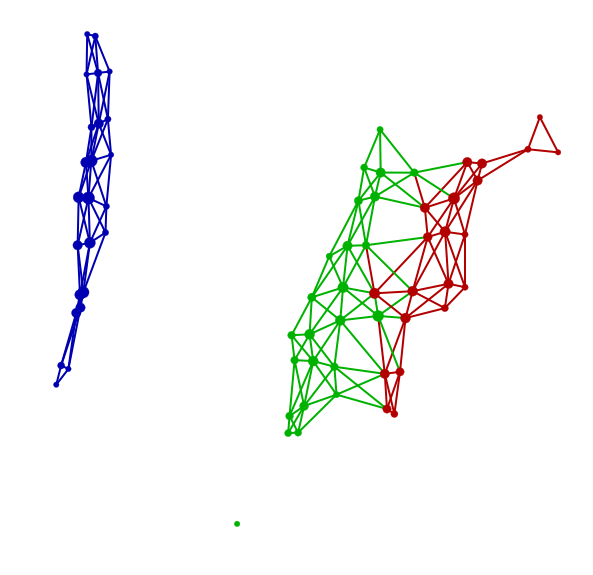

In [9]:
# 必要なモジュール
from sklearn.datasets import load_iris
from renom_tda.topology import Topology
from renom_tda.lens import PCA
# データのインポート
iris = load_iris()
data = iris.data
target = iris.target
# インスタンス作成
topology = Topology()
# データのロード
topology.load_data(data)
# ポイントクラウドの作成
metric = None
lens = [PCA(components=[0, 1])]
topology.fit_transform(metric=metric, lens=lens)
# 位相空間へマッピング
topology.map(resolution=15, overlap=0.5, eps=0.1, min_samples=3)
# トポロジーの色付け
topology.color(target, color_method="mode", color_type="rgb")
# トポロジーの表示
topology.show(fig_size=(10, 10), node_size=10, edge_width=2)